# IMPORT MODULES

In [1]:
# preprocessing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from pathlib import Path
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
pd.set_option('display.max_columns', None)
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, FunctionTransformer
from sklearn.compose import make_column_transformer
from xgboost import XGBClassifier


# models for regression 
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LogisticRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
# metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# imbalance
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


from sklearn.metrics import classification_report


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# LOADING & ANALYSING THE DATASET

In [2]:

# Load dataset
data = pd.read_csv("bank-additional.csv")


In [3]:
# Preview the first five rows of the dataset
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
# Preview the row and column size of dataset
print("Shape of dataset: ", data.shape)


Shape of dataset:  (4119, 21)


In [5]:
# Preview statistical information of train dataset, i.e., mean, std...
data.describe() 


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# Preview datatypes informations, i.e., object, int64, float64...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [7]:
# Preview unique values
data.apply(lambda x: len(x.unique()))

age                67
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
duration          828
campaign           25
pdays              21
previous            7
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         234
nr.employed        11
y                   2
dtype: int64

In [8]:
# numerical and categorical columns of dataset

num_col = data.select_dtypes(include="number").columns
cat_col = data.select_dtypes(include="object").columns

print("Numerical column names: " , num_col.tolist())
print("Categorical column names: " ,cat_col.tolist())

Numerical column names:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical column names:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


# EXPLATORY DATA ANALYSIS

<Axes: xlabel='count', ylabel='y'>

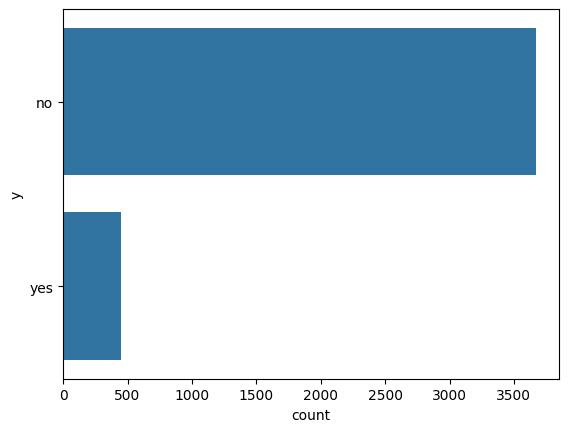

In [9]:

sns.countplot(data['y'])


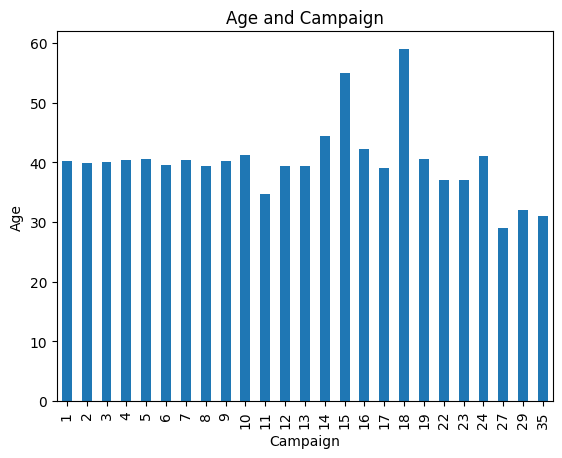

In [10]:
data.groupby("campaign")["age"].mean().plot(kind= "bar", title= "Age and Campaign", xlabel= "Campaign", ylabel="Age")
plt.show()


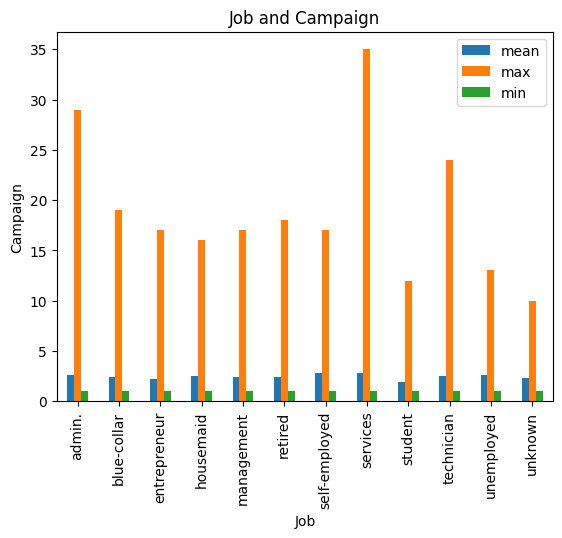

In [11]:
data.groupby("job")["campaign"].agg(["mean", "max", "min"]).plot(kind= "bar", title= "Job and Campaign", xlabel= "Job", ylabel="Campaign")
plt.show()


# PREPROCESSING

## Checking missing values

In [12]:
# Preview missing values with check_missing_value function.
def check_missing_values(data):
    missing_values=data.isnull().sum().sort_values(ascending=False) # number of missing values from up to down
    total = data.isnull().count().sort_values(ascending=True) # total number of values
    percentage = ((data.isnull().sum()/data.isnull().count()).sort_values(ascending = False))*100 # percentage of missing values
    column_type = data.dtypes # datatype information 
    table= pd.concat([missing_values,total,percentage, column_type], axis =1, keys=['Missing Values','Total', 'Percentage', 'Column Type']) # concatanation of previous findings in a table
    return table
    

In [13]:
# Preview missing value table of dataset
check_missing_values(data).head()


,Missing Values,Total,Percentage,Column Type
age,0,4119,0.0,int64
campaign,0,4119,0.0,int64
nr.employed,0,4119,0.0,float64
euribor3m,0,4119,0.0,float64
cons.conf.idx,0,4119,0.0,float64


# Checking Outliers

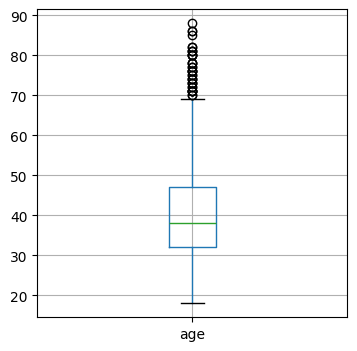

KeyError: "None of [Index(['job'], dtype='object')] are in the [columns]"

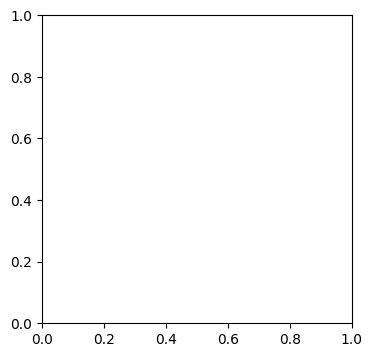

In [14]:
# Plotting the boxplot for outliers in each column
for col in data[num_col]:
    data.boxplot(column=col, figsize=(4,4))
    plt.show()

 # Correlation Matrix

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[num_col].corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Factor Analysis

In [ ]:
from sklearn.decomposition import FactorAnalysis

fact_2c=FactorAnalysis(n_components=1)
data["X_factor"]=fact_2c.fit_transform(data[['euribor3m','nr.employed','cons.price.idx','emp.var.rate']])
df=data.drop(["euribor3m","nr.employed","cons.price.idx","emp.var.rate"],axis=1)


# MODEL TRAINING

In [15]:
X = data.drop("y", axis=1)
Y = data["y"].apply(lambda x: 1 if x == "yes" else 0)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
# Define preprocessing steps for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

smote = SMOTE(sampling_strategy='auto', random_state=42)





In [18]:
models = [LogisticRegression(),
     SVC(),
     KNeighborsClassifier(),
     DecisionTreeClassifier(),
     RandomForestClassifier(),
     ExtraTreesClassifier(),
     GradientBoostingClassifier(),
     XGBClassifier()
     ]

In [19]:
def train(model):
    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', model)  # Replace with your desired classifier
])

    # Fit the model
    pipeline.fit(X_train, Y_train)

   
    # make prediction
    y_pred = pipeline.predict(X_test)

    # Classification metrics
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred, )
    f1 = f1_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test, y_pred)

    # Display metrics
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    print(classification_report(Y_test, y_pred))



In [20]:
for model in models:
    print(f"---The results of {model.__class__.__name__}---")
    train(model)
    print("\n")

---The results of LogisticRegression---
Precision: 0.4176
Recall: 0.8261
F1 Score: 0.5547
ROC AUC: 0.8406
              precision    recall  f1-score   support

           0       0.98      0.86      0.91       732
           1       0.42      0.83      0.55        92

    accuracy                           0.85       824
   macro avg       0.70      0.84      0.73       824
weighted avg       0.91      0.85      0.87       824



---The results of SVC---
Precision: 0.4128
Recall: 0.7717
F1 Score: 0.5379
ROC AUC: 0.8169
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       732
           1       0.41      0.77      0.54        92

    accuracy                           0.85       824
   macro avg       0.69      0.82      0.72       824
weighted avg       0.91      0.85      0.87       824



---The results of KNeighborsClassifier---
Precision: 0.3700
Recall: 0.8043
F1 Score: 0.5068
ROC AUC: 0.8161
              precision    recall  f1

In [22]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classification', GradientBoostingClassifier())  # Replace with your desired classifier
])

# Define a parameter grid for GridSearchCV
param_grid = {
    'classification__n_estimators': [227, 230, 233],  # Number of boosting stages
    'classification__learning_rate': [0.1, 0.01, 0.5],  # Learning rate
    'classification__max_depth': [7,5,3,9],  # Maximum depth of individual trees
}

# Set up GridSearchCV
gb_grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring= "f1",
    n_jobs=-1  # Use all available cores
)

# Fit the model
gb_grid_search.fit(X_train, Y_train)

# Best parameters found by GridSearchCV
print("Best Parameters:", gb_grid_search.best_params_)

Best Parameters: {'classification__learning_rate': 0.01, 'classification__max_depth': 5, 'classification__n_estimators': 233}


In [23]:
# Evaluate the model on the test set
gb_best_model = gb_grid_search.best_estimator_
y_pred = gb_best_model.predict(X_test)

# Classification metrics
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='binary')
recall = recall_score(Y_test, y_pred, average='binary')
f1 = f1_score(Y_test, y_pred, average='binary')
roc_auc = roc_auc_score(Y_test, gb_best_model.predict_proba(X_test)[:, 1])

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8629
Precision: 0.4393
Recall: 0.8261
F1 Score: 0.5736
ROC AUC: 0.9257
Confusion Matrix:
[[635  97]
 [ 16  76]]


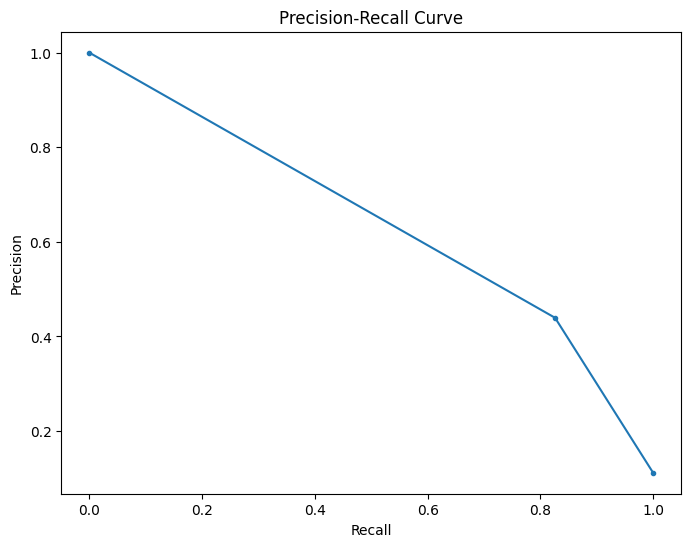

In [24]:
# Precision-Recall curve
from sklearn.metrics import precision_recall_curve


precision, recall, _ = precision_recall_curve(Y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


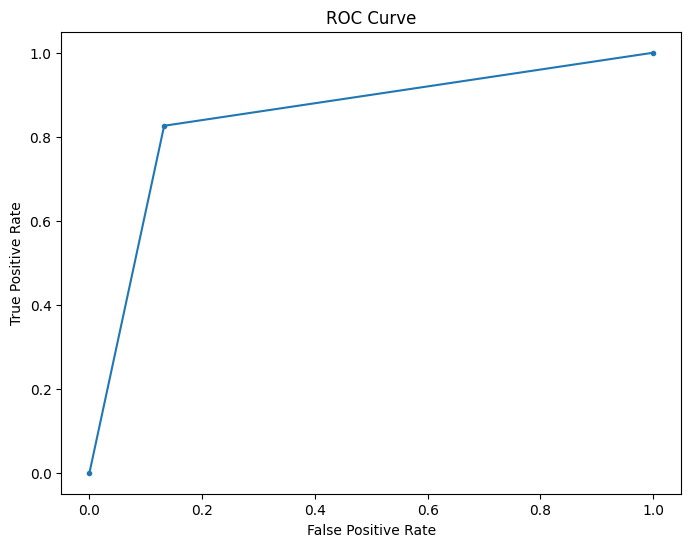

In [25]:
# ROC curve
from sklearn.metrics import roc_curve


fpr, tpr, _ = roc_curve(Y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [27]:
import pickle
# Save the best model to a file
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(gb_best_model, model_file)
print(f"Best model saved: {gb_best_model}")

Best model saved: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
            